<a href="https://colab.research.google.com/github/Fuadsadik21/Empirical-Showdown-Frequentist-vs-Bayesian/blob/main/01_Data_Preprocessing_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Preprocessing and Exploratory Data Analysis (EDA)**

### Import all necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set styles for prettier plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
%matplotlib inline

print("All libraries imported successfully!")

All libraries imported successfully!


### Load the Data from GitHub

In [2]:
data_url = "https://raw.githubusercontent.com/Fuadsadik21/Empirical-Showdown-Frequentist-vs-Bayesian/refs/heads/main/data/diabetes.csv"
df = pd.read_csv(data_url)

print("Dataset loaded successfully!")
print(f"Dataset Shape: {df.shape}")

Dataset loaded successfully!
Dataset Shape: (768, 9)


### Initial Data Exploration

In [3]:
print("=== FIRST 5 ROWS ===")
print(df.head())
print("\n=== DATASET INFO ===")
print(df.info())
print("\n=== BASIC DESCRIPTIVE STATISTICS ===")
print(df.describe())
print("\n=== CHECK FOR ANY MISSING VALUES ===")
print(df.isnull().sum())

=== FIRST 5 ROWS ===
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

=== DATASET INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null   

### Handle Missing Values (Zeros)

In [5]:
# Create a copy of the dataframe
df_clean = df.copy()

# List of columns where a value of 0 is invalid and likely represents missing data
columns_with_invalid_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace 0 with NaN in these columns
df_clean[columns_with_invalid_zeros] = df_clean[columns_with_invalid_zeros].replace(0, np.nan)

print("Number of missing values after replacing invalid zeros:")
print(df_clean.isnull().sum())

Number of missing values after replacing invalid zeros:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


### Visualize Missing Values

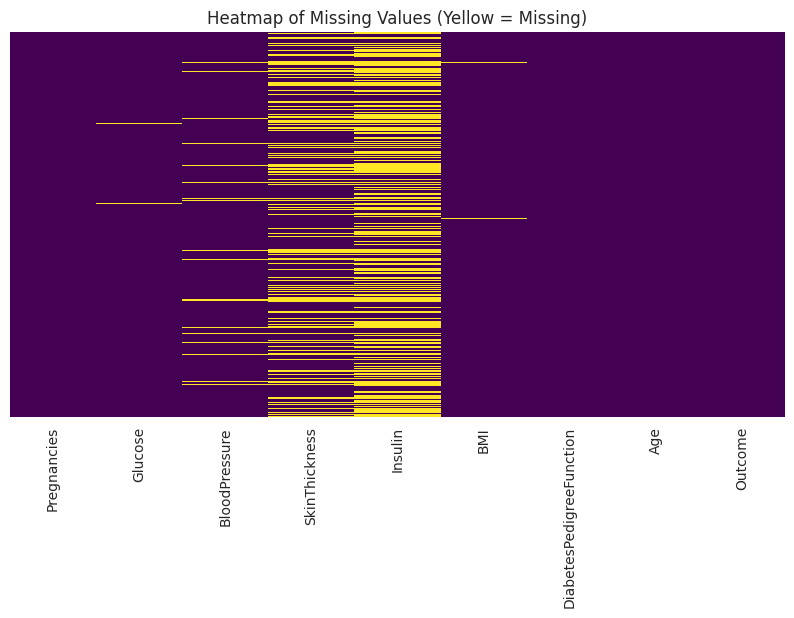

In [6]:
plt.figure(figsize=(10, 5))
sns.heatmap(df_clean.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Heatmap of Missing Values (Yellow = Missing)')
plt.show()

### Impute (Fill) Missing Values

In [7]:
# Fill missing values with the mean of each column
df_clean.fillna(df_clean.mean(), inplace=True)

# Verify no missing values remain
print("Number of missing values after imputation:")
print(df_clean.isnull().sum().sum()) # This should be 0

print("\n=== NEW DESCRIPTIVE STATISTICS (After Imputation) ===")
print(df_clean.describe())

Number of missing values after imputation:
0

=== NEW DESCRIPTIVE STATISTICS (After Imputation) ===
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.686763      72.405184      29.153420  155.548223   
std       3.369578   30.435949      12.096346       8.790942   85.021108   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.202592      29.153420  155.548223   
75%       6.000000  140.250000      80.000000      32.000000  155.548223   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.457464                  0.471876   33.240885    0.348958  
std  

### Explore the Target Variable

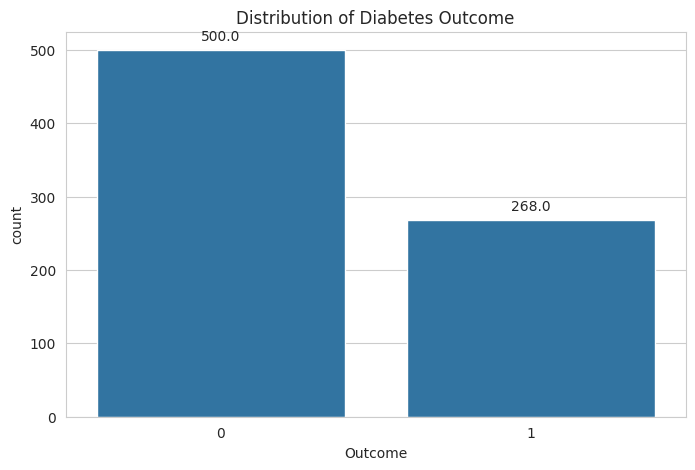

Value Counts for 'Outcome' column:
Outcome
0    500
1    268
Name: count, dtype: int64

Percentage of patients with diabetes: 34.90%


In [8]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Outcome', data=df_clean)
plt.title('Distribution of Diabetes Outcome')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

print("Value Counts for 'Outcome' column:")
print(df_clean['Outcome'].value_counts())
print(f"\nPercentage of patients with diabetes: {df_clean['Outcome'].mean() * 100:.2f}%")

### Visualize Feature Distributions by Outcome

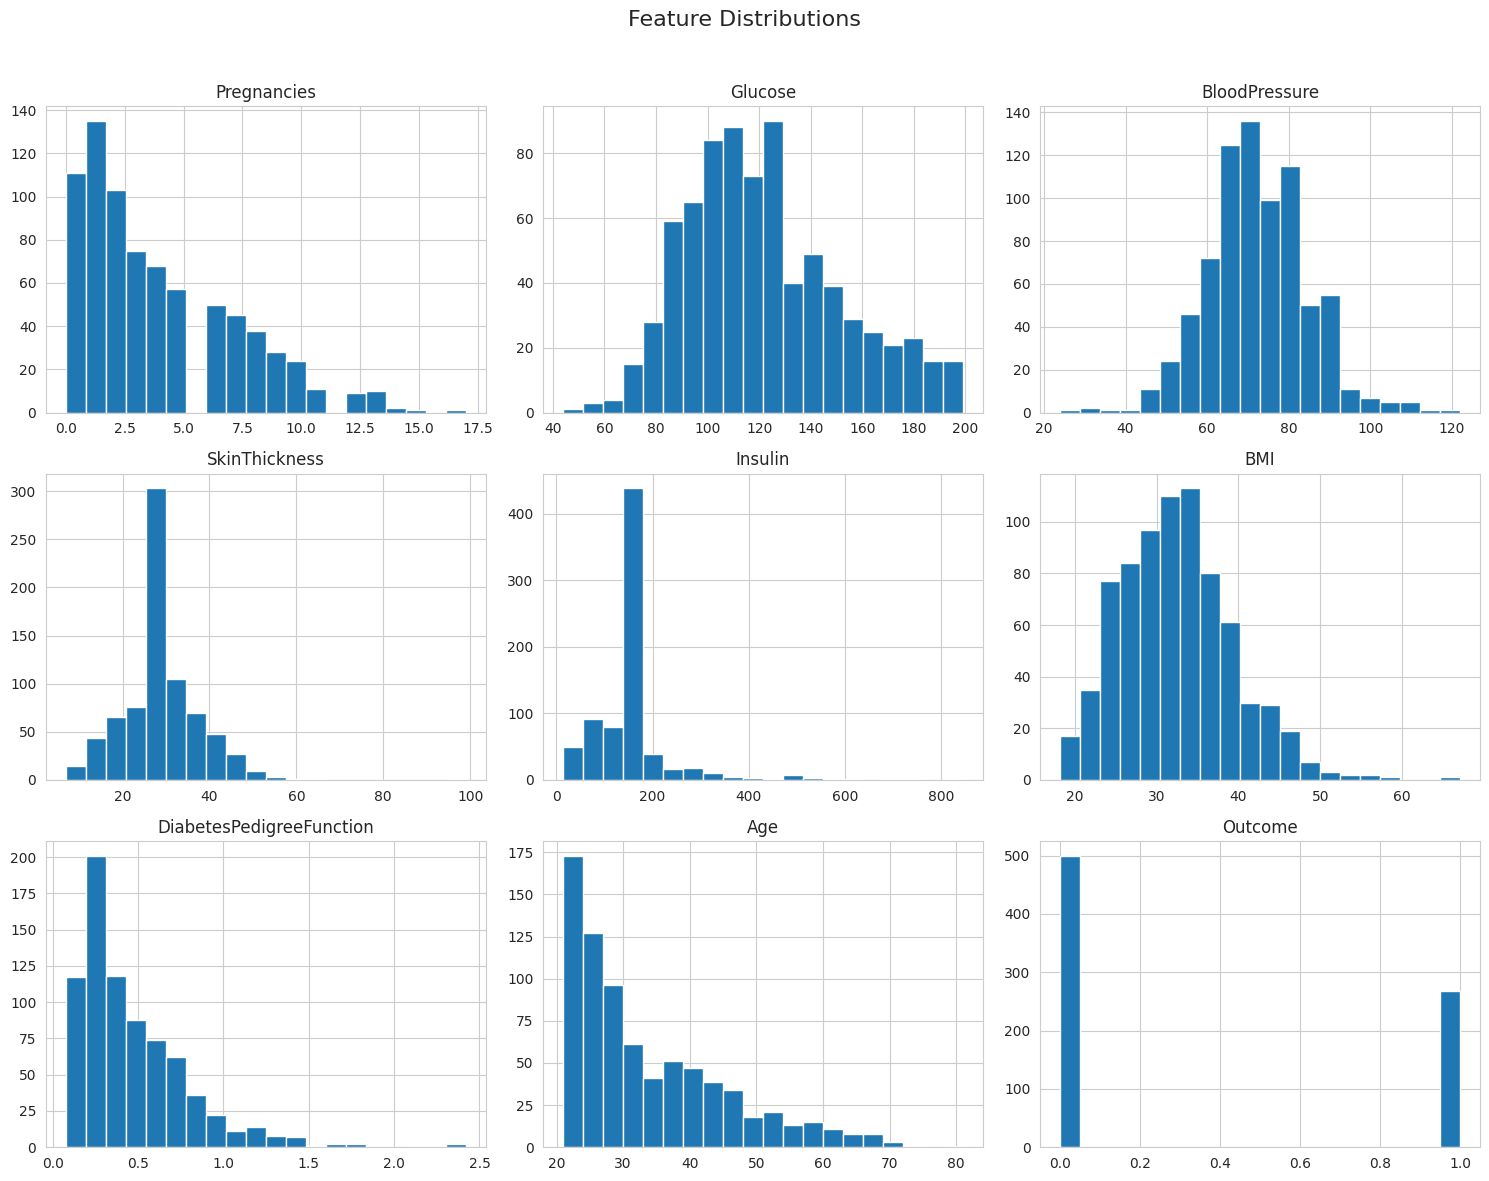

In [9]:
# Create a grid of histograms
df_clean.hist(bins=20, figsize=(15, 12))
plt.suptitle('Feature Distributions', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to make room for suptitle
plt.show()

### Compare Distributions for Diabetic vs Non-Diabetic Patients

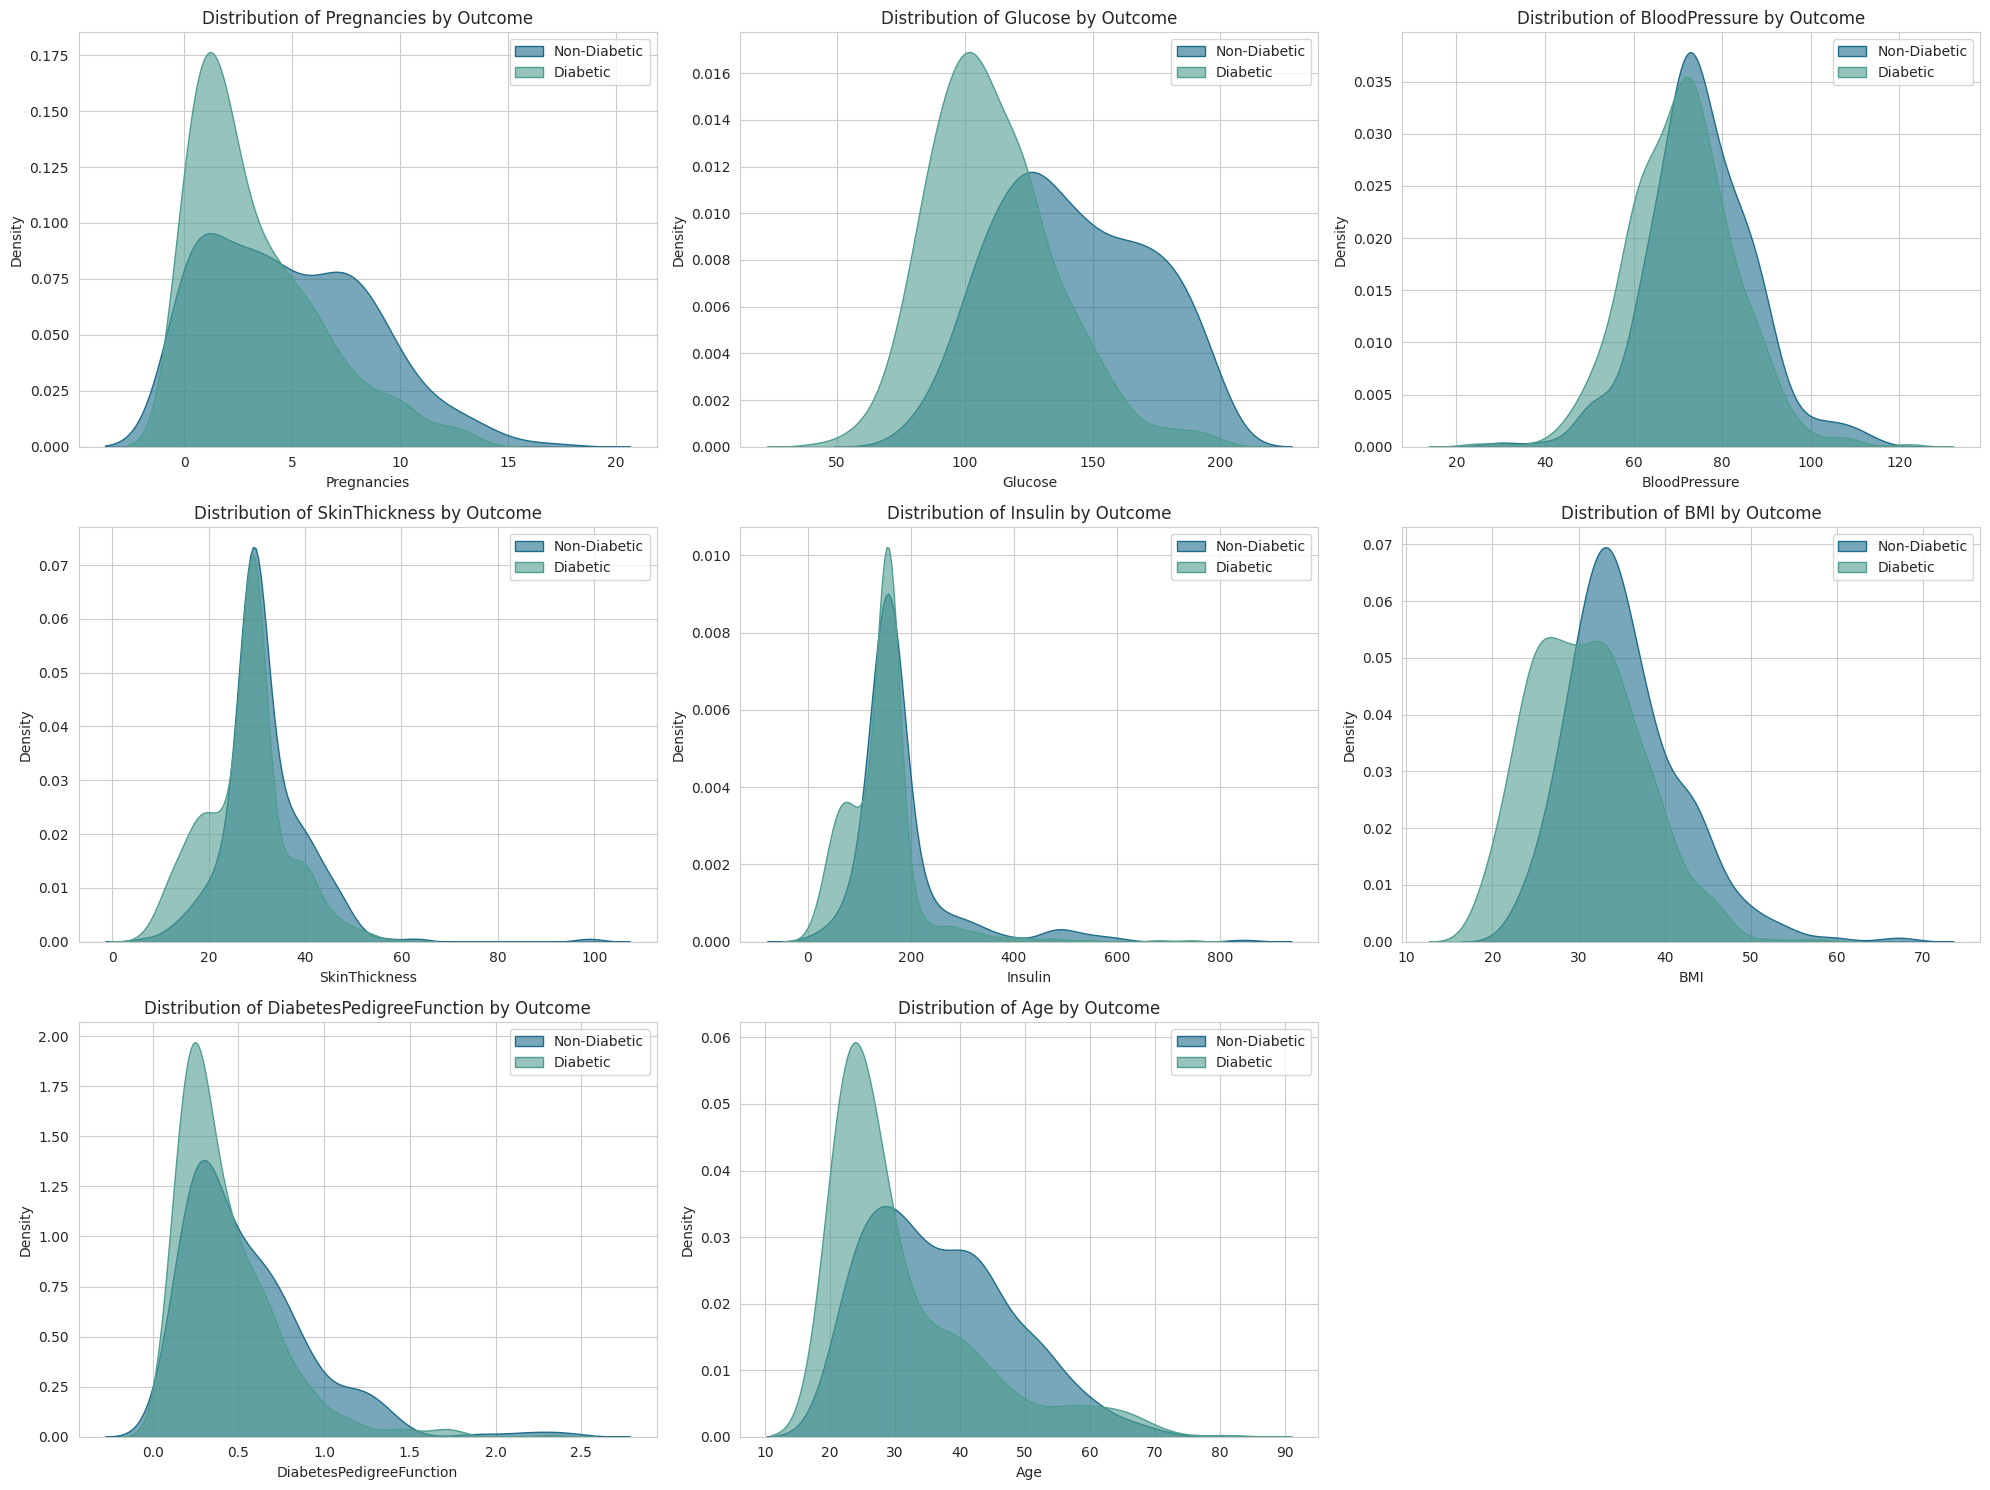

In [10]:
features = df_clean.columns[:-1] # All columns except the last one ('Outcome')

plt.figure(figsize=(20, 15))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(data=df_clean, x=feature, hue='Outcome', fill=True, common_norm=False, palette='crest', alpha=0.6)
    plt.title(f'Distribution of {feature} by Outcome')
    plt.legend(['Non-Diabetic', 'Diabetic'])
plt.tight_layout()
plt.show()

### Correlation Analysis

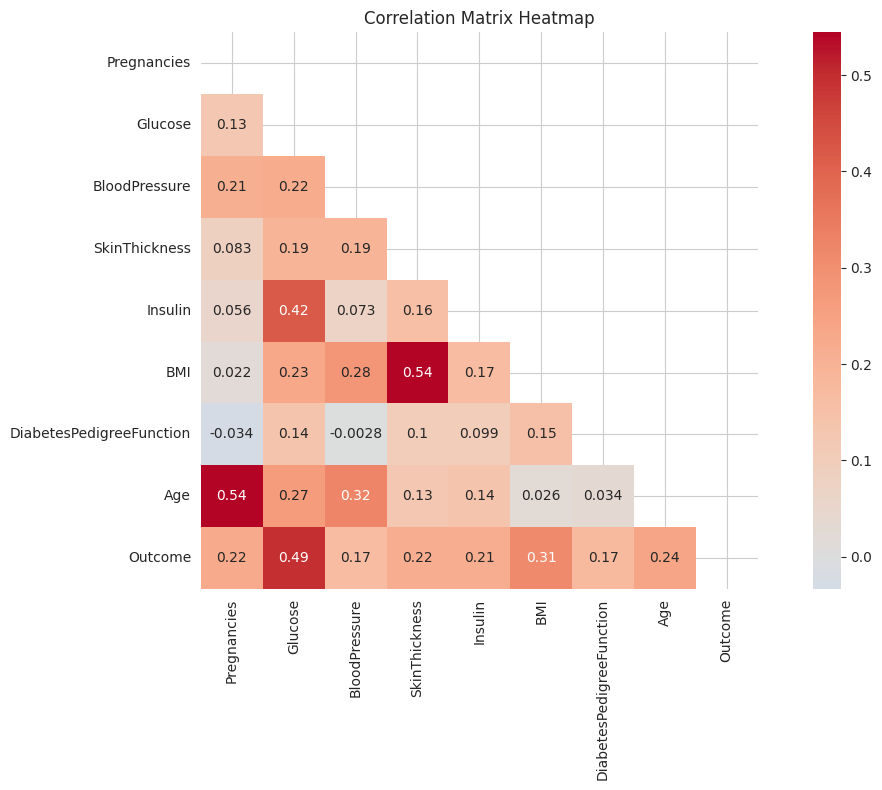

Correlation of all features with the Outcome (Target):
Outcome                     1.000000
Glucose                     0.492928
BMI                         0.311924
Age                         0.238356
Pregnancies                 0.221898
SkinThickness               0.215299
Insulin                     0.214411
DiabetesPedigreeFunction    0.173844
BloodPressure               0.166074
Name: Outcome, dtype: float64


In [11]:
# Calculate the correlation matrix
corr_matrix = df_clean.corr()

# Plot a heatmap
plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool)) # Mask the upper triangle for a cleaner look
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

# Check correlation with the target variable 'Outcome'
print("Correlation of all features with the Outcome (Target):")
print(corr_matrix['Outcome'].sort_values(ascending=False))

### Save the Cleaned Dataset

In [13]:
import os

# Create the directory if it doesn't exist
output_dir = 'data'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# This will be used in the next notebooks
df_clean.to_csv(os.path.join(output_dir, 'diabetes_clean.csv'), index=False)
print(f"Cleaned dataset saved to '{os.path.join(output_dir, 'diabetes_clean.csv')}'")

Cleaned dataset saved to 'data/diabetes_clean.csv'


## Key Observations from EDA

Based on the initial data exploration and visualization, the following key observations can be made:

* **Missing Values:** Several features, notably 'Insulin', 'SkinThickness', 'BloodPressure', 'Glucose', and 'BMI', contained zero values that were treated as missing and subsequently imputed with the mean of their respective columns. This highlights the need for careful handling of such implicit missing data.
* **Target Variable Distribution:** The 'Outcome' variable, representing the presence or absence of diabetes, is imbalanced. Approximately 34.9% of the patients in the dataset have diabetes, while the remaining 65.1% do not. This class imbalance should be considered during model training and evaluation.
* **Feature Correlations:** The correlation analysis revealed that 'Glucose' has the strongest positive correlation with the 'Outcome' variable (0.49), followed by 'BMI' (0.31) and 'Age' (0.24). This suggests these features may be important predictors of diabetes. Other features like 'BloodPressure' and 'DiabetesPedigreeFunction' show weaker correlations with the outcome.